In [6]:
import pandas as pd
import numpy as np
import warnings

## Get Data

In [7]:
col_names = ['user_id','item_id','rating','timestamp']
df = pd.read_csv('ml-100k/u.data',sep = '\t',names = col_names) #as the data is sep using tabs and not commas, and no col names are present

In [8]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [9]:
#to check how many unique users are there
print(df['user_id'].nunique())
print(df['item_id'].nunique())

943
1682


In [10]:
movie_titles = pd.read_csv('ml-100k/u.item',sep = "\|",header = None,engine = 'python')
movie_titles.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [11]:
movie_titles = movie_titles[[0,1]]
movie_titles.head(n = 10)

,0,1
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...
6,7,Twelve Monkeys (1995)
7,8,Babe (1995)
8,9,Dead Man Walking (1995)
9,10,Richard III (1995)


In [12]:
movie_titles.columns = ['item_id','title']

In [13]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [14]:
##Now we merge the 2 datasets (merging 2 data frames)
df = pd.merge(df,movie_titles,on='item_id') #it takes 'on' para to tell that both have item_id in common so merge on basis of that
df.head()
#here the first table of data is merged with table of movie names

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


## Exploratory Data Analysis

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

In [22]:
#We try to get the average rating of movies
df.groupby('title').mean()['rating'].sort_values(ascending = False)

title
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de d�cembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: rating, Length: 1664, dtype: float64

### In real life no movie can get full 5 rating as not all people will rate the movie same 5. Its only possible when it is rated by 2-3 people only, so we cannot recommend this kind of movie whose rate is 5 but is rated by 2-3 people

In [25]:
df.groupby('title').count()['rating'].sort_values(ascending = False)

title
Star Wars (1977)                              583
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
� k�ldum klaka (Cold Fever) (1994)              1
Name: rating, Length: 1664, dtype: int64

### So we create a dataframe that consists of both rating as well as how many people have rated it

In [26]:
ratings = pd.DataFrame(df.groupby('title').mean()['rating'])
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [28]:
#adding count to it
ratings['No of raters'] = pd.DataFrame(df.groupby('title').count()['rating'])
ratings.head()

,rating,No of raters
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [30]:
ratings.sort_values(by = 'rating', ascending = False)
#here see for a 5 rated movie only 1-2 people rated it

,rating,No of raters
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


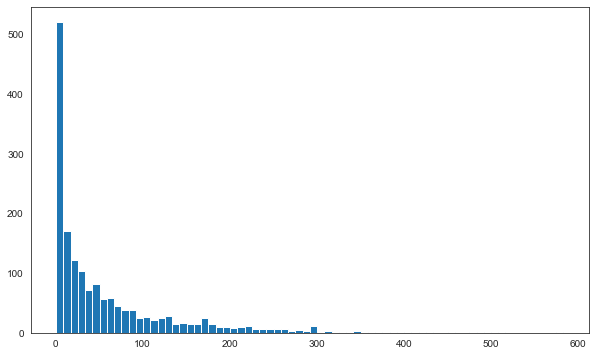

In [36]:
plt.figure(figsize = (10,6))
plt.hist(ratings['No of raters'], bins = 70)
plt.show()

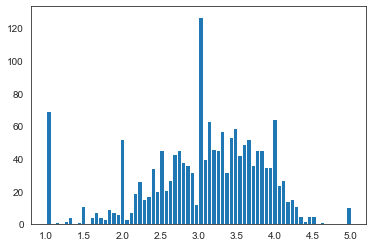

In [37]:
plt.hist(ratings['rating'],bins = 70)
plt.show()

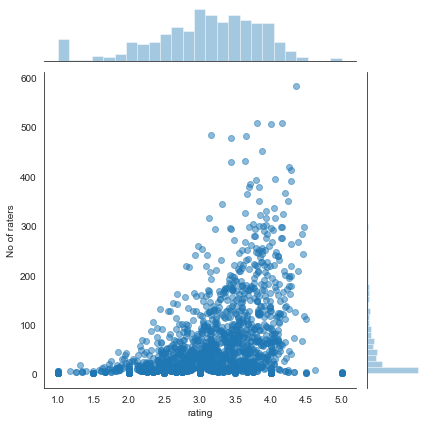

In [38]:
sns.jointplot(x = 'rating', y= 'No of raters',data = ratings, alpha = 0.5)

## Creating Movie Recommendation

In [39]:
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [43]:
#create a spreadsheet/matrix where rows are user-id and cols are tile
movieMat = df.pivot_table(index = 'user_id',columns = 'title',values = 'rating')

In [46]:
starWar_ratings = movieMat['Star Wars (1977)']
starWar_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [53]:
#Now we can correlate this starwars movie with other movies in the matrix
#So that if a person likes starwars the system would be able to recommend movies correlated to starwars
similar_to_starwars = movieMat.corrwith(starWar_ratings)
corr_starwars = pd.DataFrame(similar_to_starwars, columns = ['Correlation Factor'])
corr_starwars.head()
#here the values are the correlation value that how much correlated the foll is with starwars

/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation Factor
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [55]:
#drop NaN values
corr_starwars.dropna(inplace = True)

In [56]:
corr_starwars.head()

,Correlation Factor
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [59]:
corr_starwars.sort_values(by = 'Correlation Factor', ascending = False).head(10)
#Top 10 movies with high correlation with starwars

,Correlation Factor
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


### Here now a say few users have rated star wars 5 and same users have rated hollow reed 5 so that is why they have the perfect correlation which is wrong so we will keep a constraint that find correlation in movies that has raters > 100 

In [63]:
corr_starwars = corr_starwars.join(ratings['No of raters'])
corr_starwars.head()

,Correlation Factor,No of raters
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [64]:
ratings['No of raters']>100

title
'Til There Was You (1997)                False
1-900 (1994)                             False
101 Dalmatians (1996)                     True
12 Angry Men (1957)                       True
187 (1997)                               False
                                         ...  
Young Guns II (1990)                     False
Young Poisoner's Handbook, The (1995)    False
Zeus and Roxanne (1997)                  False
unknown                                  False
� k�ldum klaka (Cold Fever) (1994)       False
Name: No of raters, Length: 1664, dtype: bool

In [66]:
corr_starwars[corr_starwars['No of raters']>100].sort_values('Correlation Factor',ascending = False)

,Correlation Factor,No of raters
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


## Predict Function

In [71]:
def predict_movie(movie_name):
    movie_ratings = movieMat[movie_name]
    similar_to_movie = movieMat.corrwith(movie_ratings)
    
    corr_movie = pd.DataFrame(similar_to_movie,columns = ['Correlation'])
    corr_movie.dropna(inplace = True)
    
    #We'll recommend those movies only that have been rated by atleast 100 users (100 bcoz of in graph after 100 uniformity is there)
    corr_movie = corr_movie.join(ratings['No of raters'])
    predictions = corr_movie[corr_movie['No of raters']>100].sort_values('Correlation', ascending = False).head(10)
    
    return predictions

In [74]:
predict_movie("Titanic (1997)")

/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,No of raters
title,,
Titanic (1997),1.000000,350
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208
William Shakespeare's Romeo and Juliet (1996),0.430243,106
"Last of the Mohicans, The (1992)",0.427239,128
Outbreak (1995),0.426237,104
Die Hard (1988),0.403124,243
